IMPORT LIBRARIES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd                 # Data manipulation and analysis
import numpy as np                  # Numerical operations
import matplotlib.pyplot as plt     # Data visualization
import seaborn as sns
import scipy.stats as stats         # Statistical functions
import os
print(os.listdir())                 #for checking the files uploaded

['.config', 'drive', 'sample_data']


**DATA PRE-PROCESSING**

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Divvy_Trips_2017_Q1.csv")
df2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Divvy_Trips_2017_Q2.csv")
#merging the trip files for simplification
df=pd.concat([df1,df2])
stations=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Divvy_Stations_2017_Q1Q2.csv")

**DATA CLEANING**

In [ ]:
#Checking for missing values in the dataset
print(df.isnull().sum())
print('-'*150)
stations.isnull().sum()

trip_id                   0
start_time                0
end_time                  0
bikeid                    0
tripduration              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender               316867
birthyear            316683
dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------


id             0
name           0
city           0
latitude       0
longitude      0
dpcapacity     0
online_date    0
dtype: int64

In [ ]:
#Filling missing birth years with the median birth year of subscribers
median_birthyear= df['birthyear'].median()
df['birthyear'].fillna(median_birthyear, inplace=True)
# Assigning "Not Provided" to missing gender values
df['gender'].fillna('Not Provided', inplace=True)

In [ ]:
# Checking for duplicate rows in the dataset
duplicates = df.duplicated().sum()
duplicates

11

In [ ]:
# Checking for duplicate rows in the station dataset
duplicates1 = stations.duplicated().sum()
duplicates1

0

In [ ]:
# Removing duplicates if any are found
if duplicates > 0:
    df_cleaned = df.drop_duplicates()
else:
    df_cleaned = df

# Number of duplicates found and removed
duplicates_removed = duplicates
df= df_cleaned

In [ ]:
# Checking the values in the 'gender' column for not having any variations of decription of gender in the catagory (like M,male,MALE)
unique_genders = df['gender'].unique()
print(unique_genders)

['Male' 'Female' 'Not Provided']


In [ ]:
#converting starttime and endtime to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,13518905,2017-03-31 23:59:07,2017-04-01 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0
1,13518904,2017-03-31 23:56:25,2017-04-01 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0
2,13518903,2017-03-31 23:55:33,2017-04-01 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0
3,13518902,2017-03-31 23:54:46,2017-03-31 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0
4,13518901,2017-03-31 23:53:33,2017-04-01 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1119809,13518910,2017-04-01 00:06:30,2017-04-01 00:11:56,1796,326,296,Broadway & Belmont Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1960.0
1119810,13518909,2017-04-01 00:06:00,2017-04-01 00:20:53,22,893,199,Wabash Ave & Grand Ave,68,Clinton St & Tilden St,Subscriber,Male,1979.0
1119811,13518908,2017-04-01 00:04:13,2017-04-01 00:19:20,1296,907,56,Desplaines St & Kinzie St,69,Damen Ave & Pierce Ave,Subscriber,Male,1993.0
1119812,13518907,2017-04-01 00:03:08,2017-04-01 00:08:24,2695,316,332,Halsted St & Diversey Pkwy,226,Racine Ave & Belmont Ave,Subscriber,Male,1986.0


In [ ]:
# Find instances where end time is before start time and removing them
negative_durations = df[df['end_time'] < df['start_time']]
negative_duration_count = negative_durations.shape[0]
df_negative=df.drop(negative_durations.index)

In [ ]:
from datetime import datetime

# Defining the latest valid date (end of Q2 2017)
latest_valid_date = datetime(2017,6,30)

# Identifying rows where either start_time or end_time is in the future
future_dates = df[(df['start_time'] > latest_valid_date)]

# Remove these rows
df_cleaned = df.drop(future_dates.index)
#checking hoy many removed data are there
print("Original size:", df.shape[0])
print("Cleaned size:", df_cleaned.shape[0])


Original size: 1551494
Cleaned size: 1517788


In [ ]:
# Converting tripduration from seconds to minutes
df['tripduration_minutes'] = df['tripduration'] / 60
#rounding to 2 decimal places
df['tripduration_minutes'] = df['tripduration_minutes'].round(2)

# Removing rows where tripduration_minutes is less than 1
df_filtered = df[df['tripduration_minutes'] >= 1]
df =df_filtered

In [ ]:
# Extracting day of the week from start_time
df['day_of_week'] = df['start_time'].dt.day_name()
df

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,tripduration_minutes,day_of_week
0,13518905,2017-03-31 23:59:07,2017-04-01 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0,14.28,Friday
1,13518904,2017-03-31 23:56:25,2017-04-01 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0,3.93,Friday
2,13518903,2017-03-31 23:55:33,2017-04-01 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0,5.80,Friday
3,13518902,2017-03-31 23:54:46,2017-03-31 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0,4.80,Friday
4,13518901,2017-03-31 23:53:33,2017-04-01 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,6.92,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119809,13518910,2017-04-01 00:06:30,2017-04-01 00:11:56,1796,326,296,Broadway & Belmont Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1960.0,5.43,Saturday
1119810,13518909,2017-04-01 00:06:00,2017-04-01 00:20:53,22,893,199,Wabash Ave & Grand Ave,68,Clinton St & Tilden St,Subscriber,Male,1979.0,14.88,Saturday
1119811,13518908,2017-04-01 00:04:13,2017-04-01 00:19:20,1296,907,56,Desplaines St & Kinzie St,69,Damen Ave & Pierce Ave,Subscriber,Male,1993.0,15.12,Saturday
1119812,13518907,2017-04-01 00:03:08,2017-04-01 00:08:24,2695,316,332,Halsted St & Diversey Pkwy,226,Racine Ave & Belmont Ave,Subscriber,Male,1986.0,5.27,Saturday


DATA ANALYSIS AND VISUALIZATION

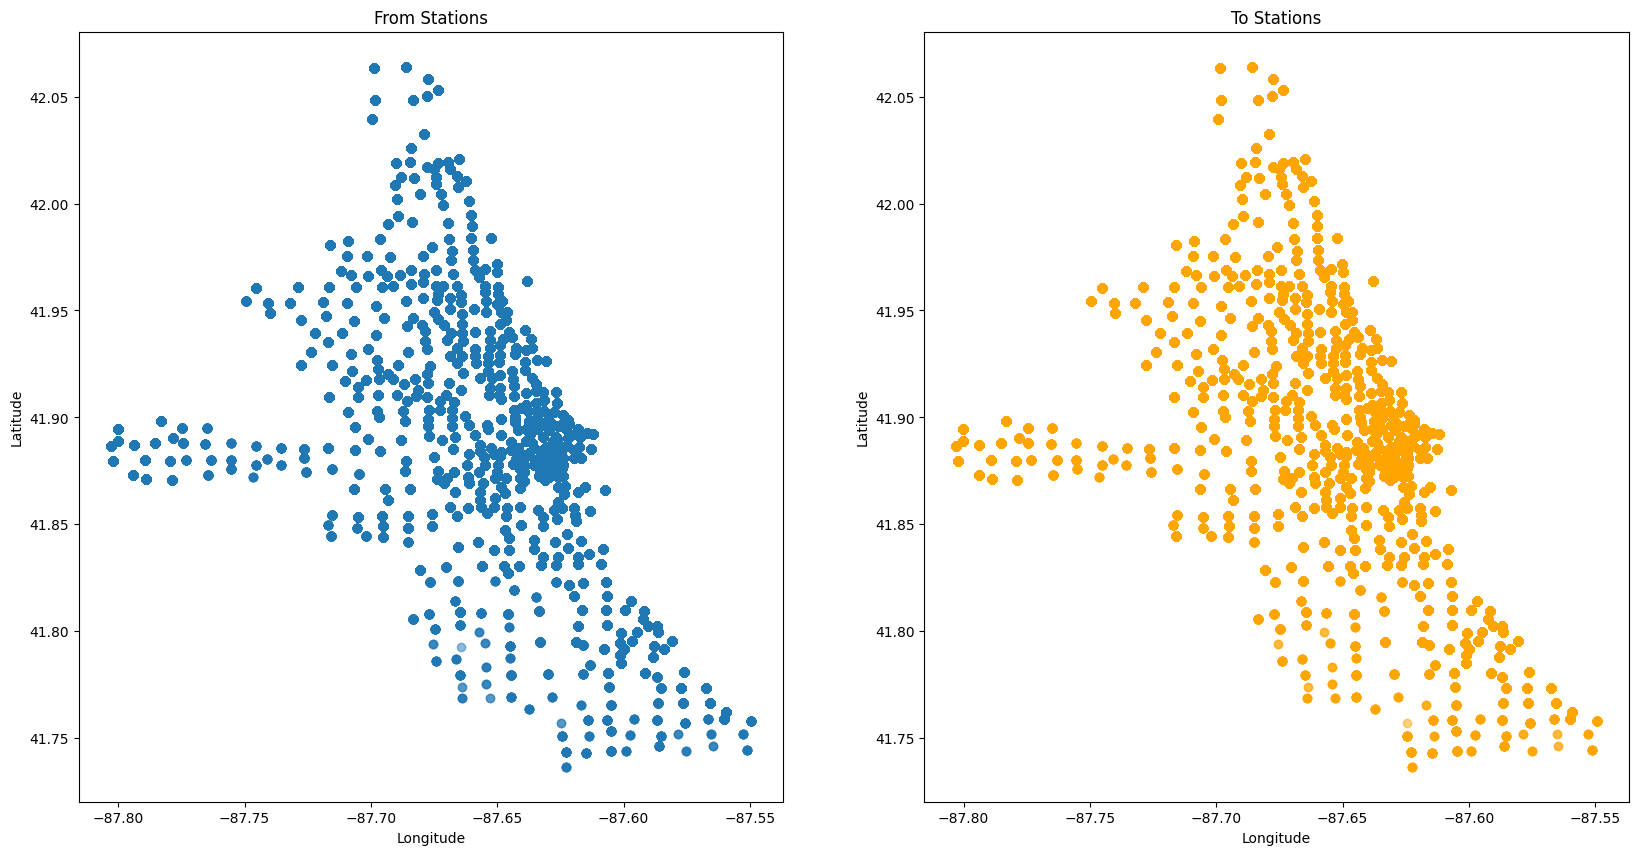

In [ ]:
#finding where the locations of stations which are high demand
# Merge station data
from_stations = df.merge(stations, left_on='from_station_id', right_on='id')
to_stations = df.merge(stations, left_on='to_station_id', right_on='id')
plt.figure(figsize=(20, 10))

# First subplot for 'from' stations
plt.subplot(1, 2, 1)
plt.scatter(from_stations['longitude'], from_stations['latitude'], alpha=0.5)
plt.title('From Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Second subplot for 'to' stations
plt.subplot(1, 2, 2)
plt.scatter(to_stations['longitude'], to_stations['latitude'], alpha=0.5, color='orange')
plt.title('To Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
!pip install folium
import folium
from folium.plugins import HeatMap
# Aggregate trip data by station
station_usage = df['from_station_id'].value_counts().reset_index()
station_usage.columns = ['station_id', 'num_trips']

# Merge with station location data
station_locations = stations[['id', 'latitude', 'longitude']]
merged_data = station_usage.merge(station_locations, left_on='station_id', right_on='id')

# Create a map centered around an average location
map_center = [merged_data['latitude'].mean(), merged_data['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Add a heatmap to the map
heat_data = [[row['latitude'], row['longitude']] for index, row in merged_data.iterrows()]
HeatMap(heat_data).add_to(m)
m

In [ ]:
# Calculate daily check-outs and check-ins for each station for checking if the dpcapacity is sufficient/day
# We assume a bike checked out from a station and checked in to a station are separate events
daily_check_outs = df.groupby([df['start_time'].dt.date, 'from_station_id']).size()
daily_check_ins = df.groupby([df['end_time'].dt.date, 'to_station_id']).size()

# Convert groupby objects to DataFrame and reset index
daily_check_outs = daily_check_outs.reset_index(name='daily_check_outs')
daily_check_ins = daily_check_ins.reset_index(name='daily_check_ins')

# Merge the check-outs and check-ins data
daily_traffic = pd.merge(daily_check_outs, daily_check_ins, left_on=['start_time', 'from_station_id'],
                         right_on=['end_time', 'to_station_id'], how='outer').fillna(0)

# Drop redundant columns and rename for clarity
daily_traffic.drop(['end_time', 'to_station_id'], axis=1, inplace=True)
daily_traffic.rename(columns={'start_time': 'date', 'from_station_id': 'station_id'}, inplace=True)

# Merge with station data to get dpcapacity
daily_traffic = daily_traffic.merge(stations[['id', 'dpcapacity']], left_on='station_id', right_on='id', how='left')

# Sum check-outs and check-ins to get total daily traffic per station
daily_traffic['total_traffic'] = daily_traffic['daily_check_outs'] + daily_traffic['daily_check_ins']

# Determine if dpcapacity is sufficient (total_traffic <= dpcapacity)
daily_traffic['sufficient_capacity'] = daily_traffic['total_traffic'] <= daily_traffic['dpcapacity']
insufficient_capacity = daily_traffic[daily_traffic['sufficient_capacity'] == False]
insufficient_capacity.dropna()


,date,station_id,daily_check_outs,daily_check_ins,id,dpcapacity,total_traffic,sufficient_capacity
2,2017-01-01,4.0,13.0,17.0,4.0,23.0,30.0,False
12,2017-01-01,20.0,6.0,10.0,20.0,15.0,16.0,False
15,2017-01-01,24.0,7.0,13.0,24.0,15.0,20.0,False
17,2017-01-01,26.0,21.0,18.0,26.0,31.0,39.0,False
26,2017-01-01,35.0,30.0,35.0,35.0,47.0,65.0,False
...,...,...,...,...,...,...,...,...
81892,2017-06-30,604.0,11.0,15.0,604.0,15.0,26.0,False
81897,2017-06-30,609.0,8.0,11.0,609.0,15.0,19.0,False
81907,2017-06-30,620.0,27.0,18.0,620.0,15.0,45.0,False
81908,2017-06-30,622.0,8.0,9.0,622.0,0.0,17.0,False


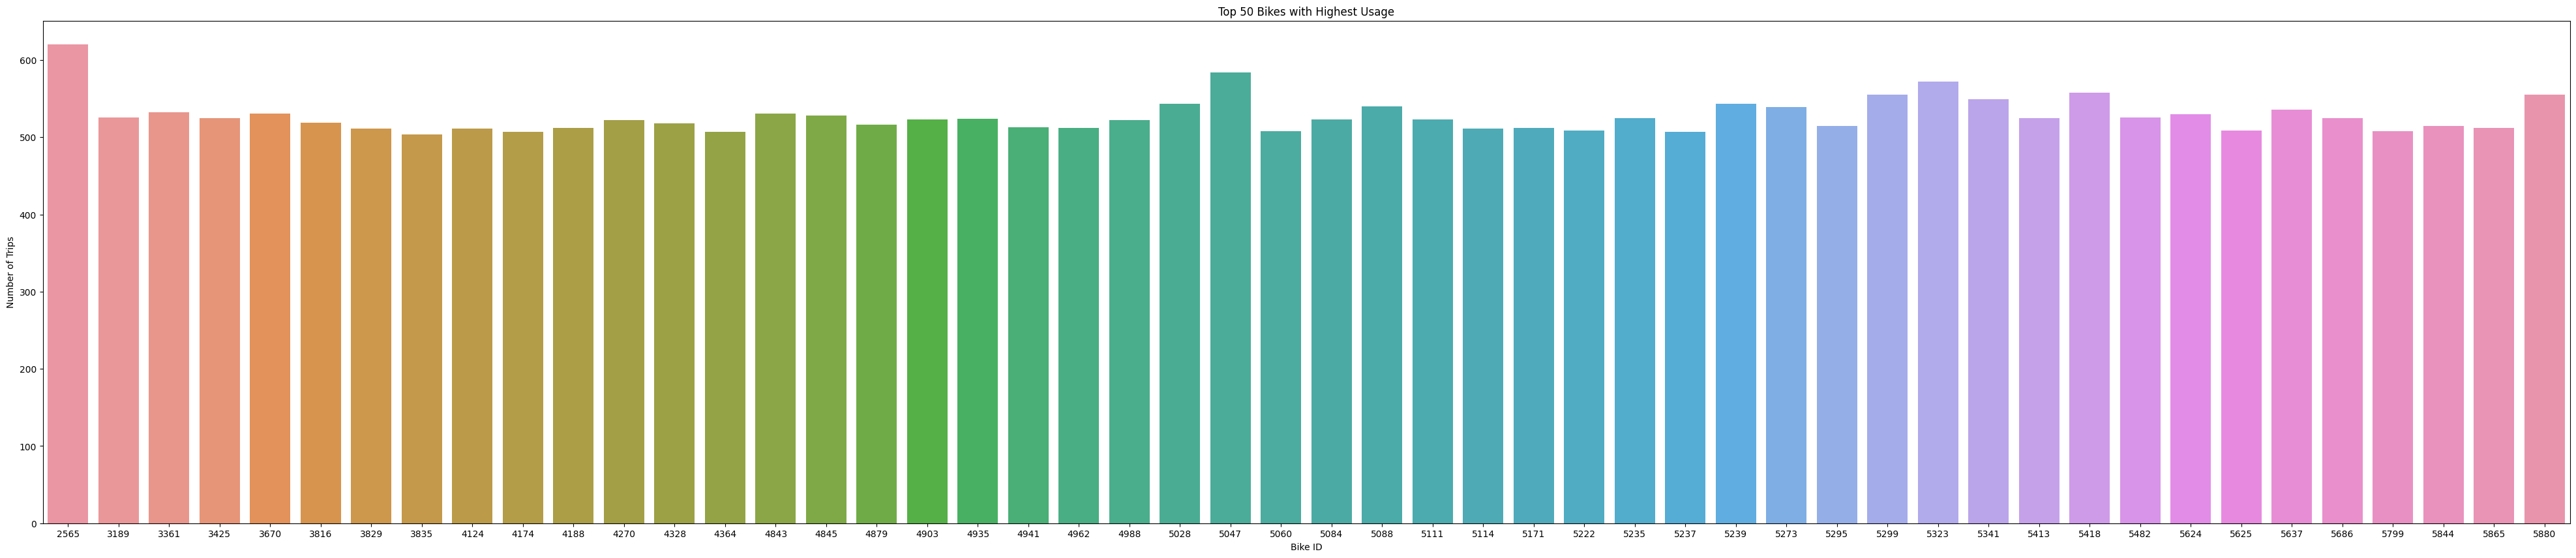

In [ ]:
# Count the number of trips for each bike
bike_usage = df['bikeid'].value_counts()

# Select the top N bikes with the highest usage
top_n = 50
top_bikes = bike_usage.head(top_n)

# Create a bar chart for visualization
plt.figure(figsize=(50, 10))
sns.barplot(x=top_bikes.index, y=top_bikes.values)
plt.title('Top 50 Bikes with Highest Usage')
plt.xlabel('Bike ID')
plt.ylabel('Number of Trips')
plt.show()


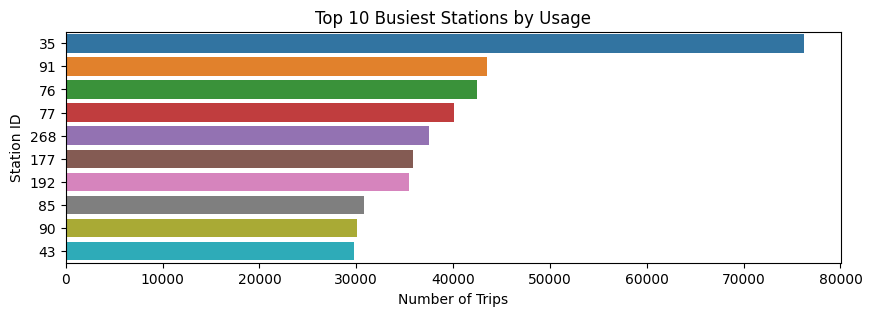

In [ ]:
#most 10 busiest station by usage
# Count trips starting at each station
outgoing_counts = df['from_station_id'].value_counts()
# Count trips ending at each station
incoming_counts = df['to_station_id'].value_counts()
total_counts = outgoing_counts.add(incoming_counts, fill_value=0)
# Sort stations by total counts and select the top N
top_n = 10
top_stations = total_counts.sort_values(ascending=False).head(top_n)

# Visualization
plt.figure(figsize=(10, 3))
sns.barplot(x=top_stations.values, y=top_stations.index.astype(str))
plt.title(f'Top {top_n} Busiest Stations by Usage')
plt.xlabel('Number of Trips')
plt.ylabel('Station ID')

plt.show()


In [ ]:
# Revenue generated
price_per_year_subscriber = 108
price_per_trip_single_ride = 3.3
price_per_day_customer = 15
#The actual revenue calculation might need to consider additional factors such as discounts, special offers, multiple trips by customers in a single day, etc
# Subscribers
subscriber_count = df[df['usertype'] == 'Subscriber']['bikeid'].nunique()
subscriber_revenue = subscriber_count * price_per_year_subscriber

# Single Ride
single_ride_count = df[df['usertype'] == 'Single Ride'].shape[0]
single_ride_revenue = single_ride_count * price_per_trip_single_ride

# Customers (Assuming each trip is a new day pass)
customer_count = df[df['usertype'] == 'Customer'].shape[0]
customer_revenue = customer_count * price_per_day_customer

# Total revenue
total_revenue = subscriber_revenue + single_ride_revenue + customer_revenue

print(f"Subscriber Revenue: ${subscriber_revenue}")
print(f"Single Ride Revenue: ${single_ride_revenue}")
print(f"Customer Revenue: ${customer_revenue}")
print(f"Total Revenue: ${total_revenue}")


Subscriber Revenue: $612252
Single Ride Revenue: $0.0
Customer Revenue: $4757265
Total Revenue: $5369517.0


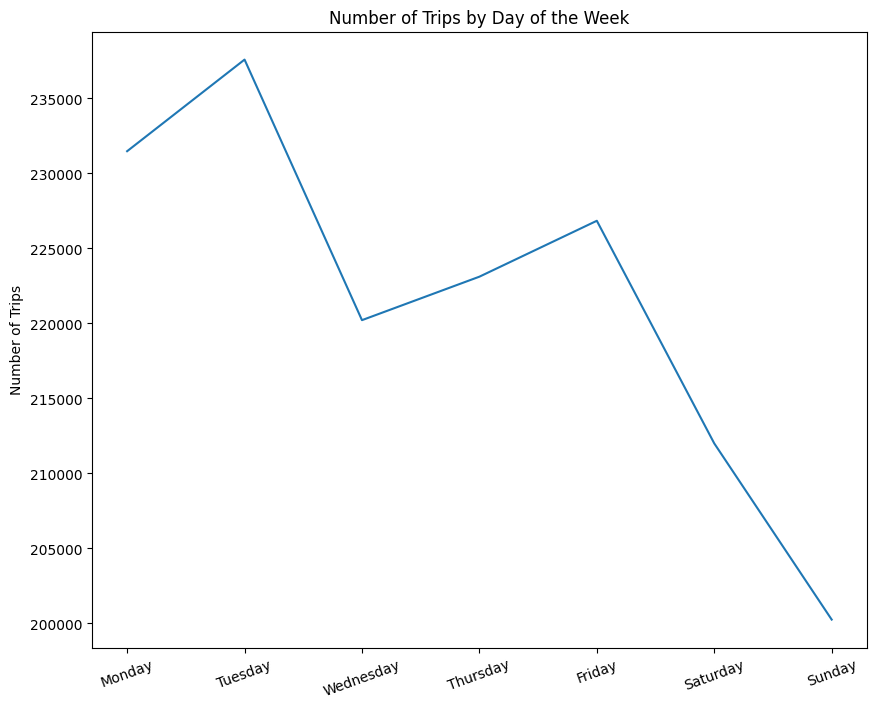

In [ ]:
#finding the busiest day
day_of_week_counts = df['day_of_week'].value_counts()
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_of_week_counts = day_of_week_counts.reindex(ordered_days)
# Visualize the data
plt.figure(figsize=(10, 8))
sns.lineplot(x=day_of_week_counts.index, y=day_of_week_counts.values)
plt.title('Number of Trips by Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=20)
plt.show()

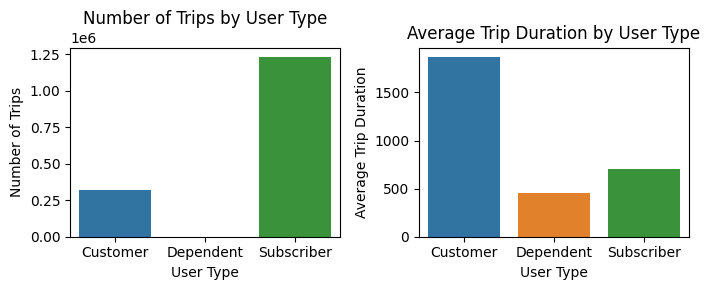

In [ ]:
# Group data by user type
grouped = df.groupby('usertype')
# Calculate number of trips and average trip duration for each user type
trip_counts = grouped.size()
average_duration = grouped['tripduration'].mean()  #tripduration is in seconds
plt.figure(figsize=(7, 3))
# First subplot for number of trips
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x=trip_counts.index, y=trip_counts.values)
plt.title('Number of Trips by User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Trips')

# Second subplot for average trip duration
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x=average_duration.index, y=average_duration.values)
plt.title('Average Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Average Trip Duration')

# Show the plots
plt.tight_layout()  # Adjusts the plots to fit into the figure area.
plt.show()


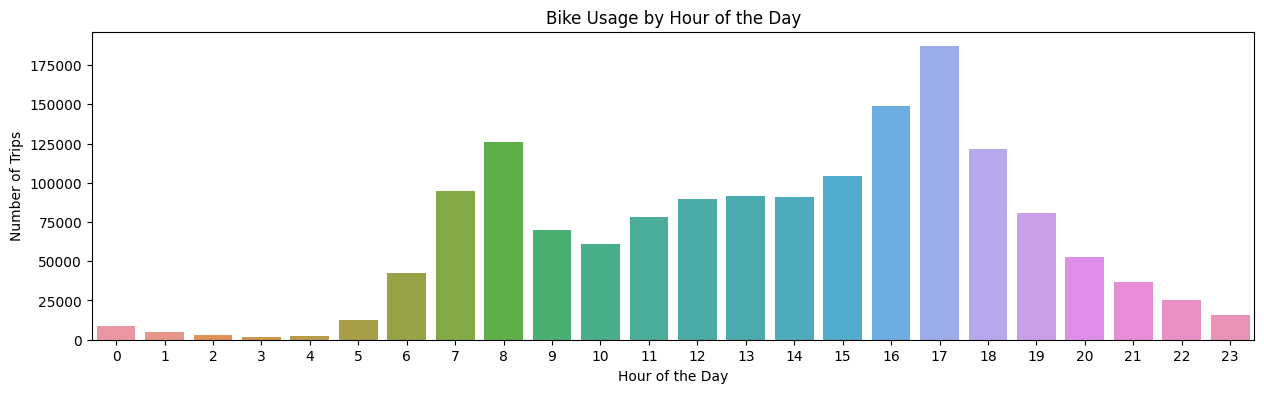

In [ ]:
#finding the busiest hour
df['start_hour'] = df['start_time'].dt.hour
# Group by start_hour and count the number of trips
hourly_counts = df['start_hour'].value_counts().sort_index()
# Visualize the data
plt.figure(figsize=(15, 4))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title('Bike Usage by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.show()

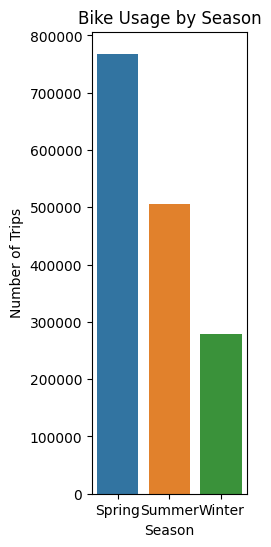

In [ ]:
# im mexico the seasons are winter[jan to feb] , spring[mar to may]
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7,]:
        return 'Summer'
    else:
        return 'Winter'
#Extract month from start_time
df['month'] = df['start_time'].dt.month
# Assign each trip to a season
df['season'] = df['month'].apply(get_season)
# Group by season and count the number of trips
seasonal_counts = df['season'].value_counts()

# Visualize the data
plt.figure(figsize=(2, 6))
sns.barplot(x=seasonal_counts.index, y=seasonal_counts.values)
plt.title('Bike Usage by Season')
plt.xlabel('Season')
plt.ylabel('Number of Trips')
plt.show()

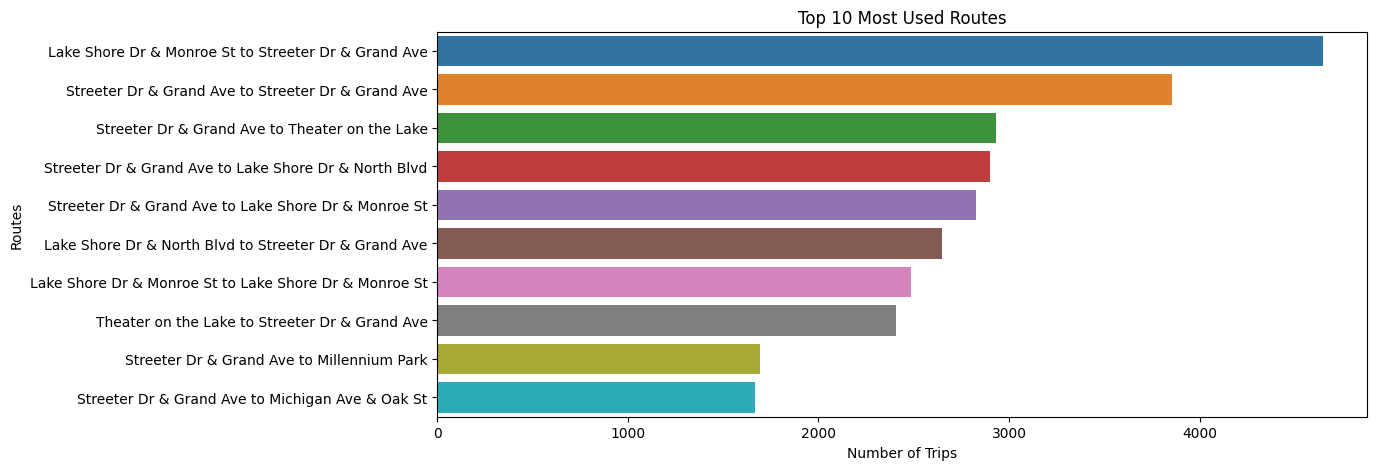

In [ ]:
# busiest route analysis
df['route'] = df['from_station_name'] + " to " + df['to_station_name']

# Count the number of trips for each route
route_counts = df['route'].value_counts()
top_n = 10
top_routes = route_counts.head(top_n)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_routes, y=top_routes.index)
plt.title(f'Top {top_n} Most Used Routes')
plt.xlabel('Number of Trips')
plt.ylabel('Routes')
plt.show()


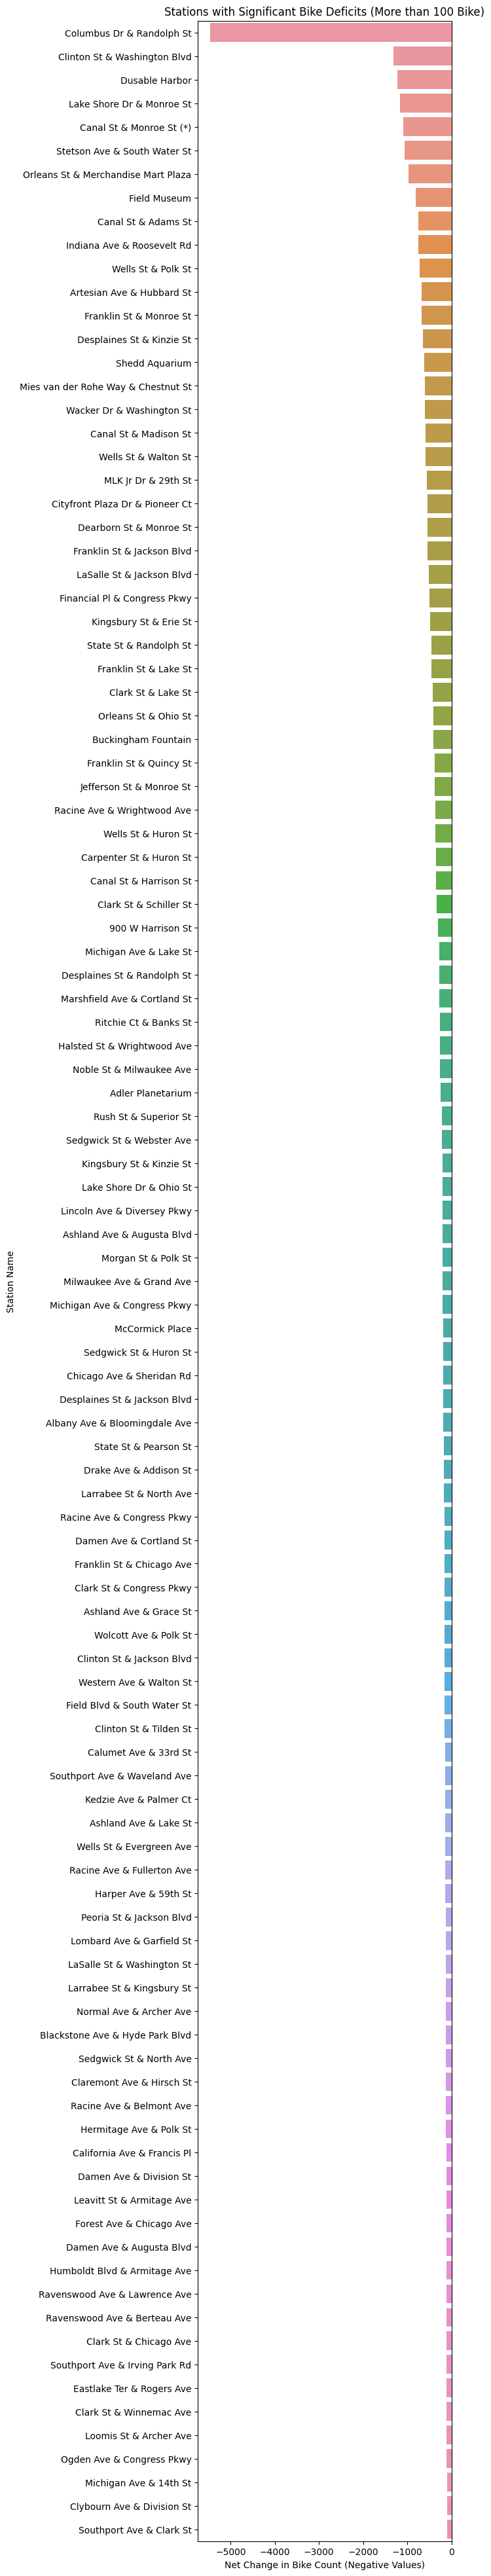

In [ ]:
#the stations which has more check-outs of bikes than check-ins of bikes (both quarters)

# Count check-outs (bikes leaving) for each station
check_outs = df.groupby('from_station_name').size()
# Count check-ins (bikes arriving) for each station
check_ins = df.groupby('to_station_name').size()
# Calculate net change (check_ins - check_outs)
# Using .reindex to ensure all stations are included, filling missing values with 0
net_change = check_ins.reindex(check_outs.index, fill_value=0) - check_outs.reindex(check_ins.index, fill_value=0)
# Identify stations with more check-outs than check-ins
stations_with_more_check_outs = net_change[net_change < 0]
# Filter to include only stations with a deficit of two bikes or more
significant_deficits = net_change[net_change < -100]

# Sort the stations by net change to display the ones with the largest deficits first
significant_deficits_sorted = significant_deficits.sort_values()

# Create a bar chart
plt.figure(figsize=(5,50))
sns.barplot(x=significant_deficits_sorted.values, y=significant_deficits_sorted.index)
plt.title('Stations with Significant Bike Deficits (More than 100 Bike)')
plt.xlabel('Net Change in Bike Count (Negative Values)')
plt.ylabel('Station Name')
plt.show()


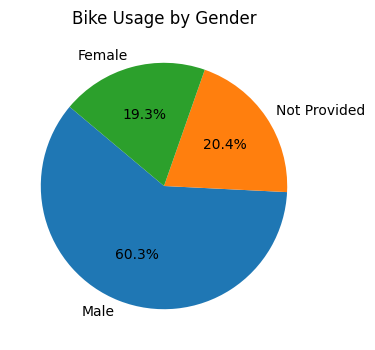

In [ ]:
# Count the number of trips by gender
gender_distribution = df['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Bike Usage by Gender')
plt.show()


In [ ]:
# Haversine formula to calculate the distance between two lat-lon points
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert degrees to radians
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    # Differences in coordinates
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Haversine formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    # Distance in kilometers
    distance = R * c
    return distance

# Merge the trips with the stations data to get coordinates of start and end stations
trips_stations = df1.merge(stations[['id', 'latitude', 'longitude']], left_on='from_station_id', right_on='id')
trips_stations = trips_stations.merge(stations[['id', 'latitude', 'longitude']], left_on='to_station_id', right_on='id', suffixes=('_start', '_end'))

# Calculate the distance for each trip
trips_stations['distance_km'] = haversine(trips_stations['latitude_start'], trips_stations['longitude_start'],
                                          trips_stations['latitude_end'], trips_stations['longitude_end'])

# Display the rows of the resulting DataFrame with the distance
trips_stations[['trip_id', 'from_station_id', 'to_station_id', 'distance_km']].head()



,trip_id,from_station_id,to_station_id,distance_km
0,13518905,66,171,3.541271
1,13144289,66,171,3.541271
2,13465695,59,171,2.692267
3,13436111,59,171,2.692267
4,13333740,59,171,2.692267


<ipython-input-29-ed12f0c9ccde>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['start_time'] = pd.to_datetime(station_data['start_time'])


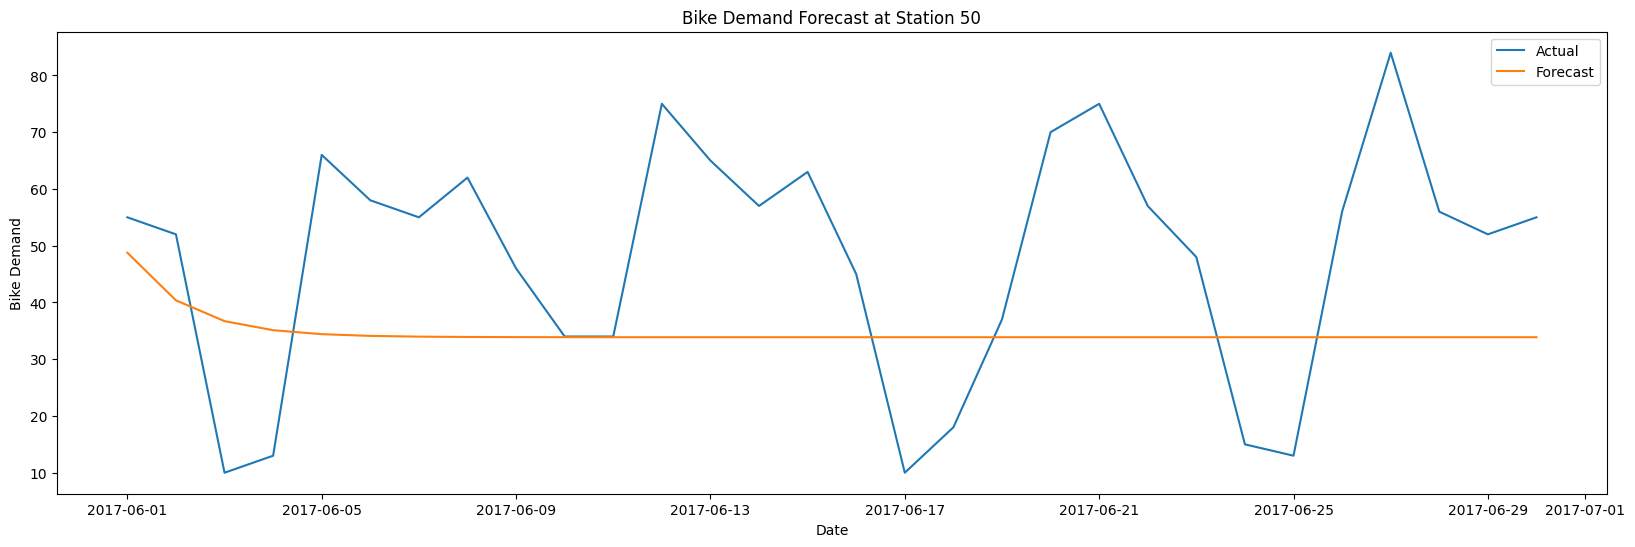

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Choose a station for analysis (example: Station ID 35)
selected_station_id = 50

# Filter data for the selected station
station_data = df[df['from_station_id'] == selected_station_id]

# Convert start_time to datetime and aggregate data by day
station_data['start_time'] = pd.to_datetime(station_data['start_time'])
daily_data = station_data.resample('D', on='start_time').size()
# Split data into training and testing sets
train = daily_data.iloc[:-30]
test = daily_data.iloc[-30:]

# Define and fit the ARIMA model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=30)

# Plotting the results
plt.figure(figsize=(20, 6))
plt.plot(test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.title('Bike Demand Forecast at Station ' + str(selected_station_id))
plt.xlabel('Date')
plt.ylabel('Bike Demand')
plt.legend()
plt.show()
